In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos librerias de scikit learn para clasificacion y modelos de SVM.
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
# importamos librearias de Logistic Regression
from sklearn.linear_model import LogisticRegression

In [4]:
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

In [5]:
# Importamos librerias de PCA
from sklearn.decomposition import PCA

In [6]:
pwd

'C:\\Users\\Alejandra\\Google Drive\\5° año\\Ciencia de datos\\clase_05-master'

# Importamos dataset de Wisconsin Breast Cancer

In [7]:
breast = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\clase_05-master\clusterai_2019_clase05_dataset_breast_wisconsin.csv', delimiter=';')

In [8]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Separamos nuestra variable independiente X y nuestra variable Y

In [9]:
x = breast.iloc[:,2:]

In [10]:
y = breast.iloc[:,1]

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

# Separamos nuestros datos en Train y Test

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

# Realizamos Auto Scaling

In [13]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest)  

In [15]:
xtrain_scal.shape

(398, 30)

# Analisis de Componentes Principales (PCA)
Vamos a obtener primeros 20 autovalores y autovectores (eigenvalues y eigenvectors) de la matriz de train "xtrain_scal". 

In [22]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [23]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones
xpca.shape

(398, 10)

# Observamos los autovalores obtenidos del PCA
Recordemos que los autovalores significa la variabilidad que "atrapa" cada componente principal. Obviamente siempre vamos a priorizar las componentes principales que mayor variabilidad capten de los datos de entrenamiento.

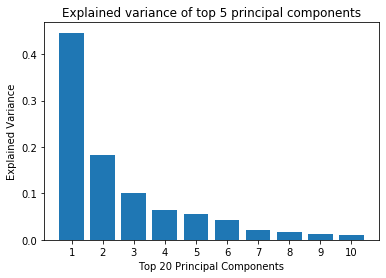

In [25]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Scatter plot del PCA
Con las 2 primeras componentes principales **antes** de la selección de variables visualizamos nuestras muestras/samples de train. **Atencion!** vean que estamos visualizando datos de 30 dimensiones en solamente 2 :). Otro punto importante es que con las dos primeras componentes principales captamos el 65 % aprox de la variabilidad de mis datos (hacer explained variance de PC1 + PC2)

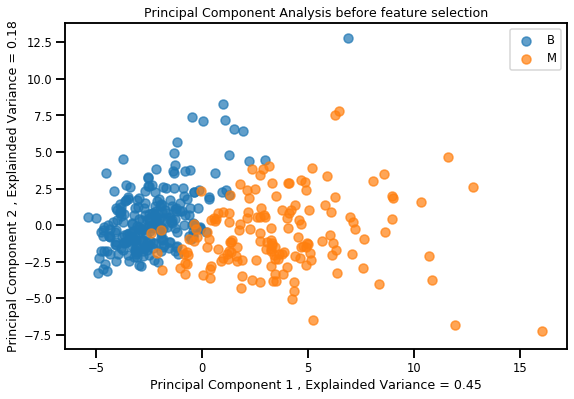

In [26]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.7, label = 'B')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.7, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

Estamos visualizando datos de alta dimension en 2 dimensiones :):):):). Ojo que con las dos primeras componentes visualizamos el 63% de la variabilidad del dataset original. Es decir que sirve para darnos una idea aunque lo que se aconseja es quedarse con las componentes que acumulan aunque sea el 80% de la variabilidad original.

In [27]:
# vamos a visualizar en 3d
from mpl_toolkits.mplot3d import Axes3D

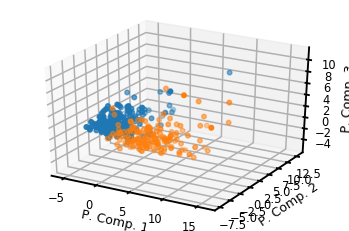

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca.iloc[(ytrain == 0).ravel(),0], xpca.iloc[(ytrain == 0).ravel(),1], xpca.iloc[(ytrain == 0).ravel(),2])
ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 1')
ax.set_ylabel('P. Comp. 2')
ax.set_zlabel('P. Comp. 3')
plt.show()

# Feature Selection con Variance Threshold

Computamos el desvio standard de cada feature. Luego decidimos quedarnos con aquellas cuyo STDEV sea mayor a un cuantil determinado. Eso resultara de un vector "mascara" booleano que nos serirá para filtrar el dataset original. Vean que este metodo es no supervisado aunque su debilidad es que es univariado.

In [31]:
# umbral para definir con que % de features nos quedamos
thresh = 0.5

In [32]:
xtrain_scal_red_var = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
xtest_scal_red_var = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]

In [33]:
print("La cantidad de Features seleccionadas son " + str(np.shape(xtrain_scal_red_var)[1]))

La cantidad de Features seleccionadas son 15


# Feature Selection con Lasso

In [34]:
# creamos nuestro modelo de seleccion de variables Lasso_featsel
# El hiperparametro Alpha (o lambda en la teoria) es seleccionado por el usuario
#hay una funcion lasso.cv para que haga gridsearch
lasso_featsel = Lasso(alpha = 0.01)
lasso_featsel.fit(xtrain_scal,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Con el Lasso path podemos visualizar a modo de entender un poco mas la teoria como evolucionan los pesos de las variables a medida que aumentamos la penalizacion. A valores muy bajos de alphas sobreviven muy pocas features.

In [35]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(xtrain_scal, ytrain, fit_intercept=False)

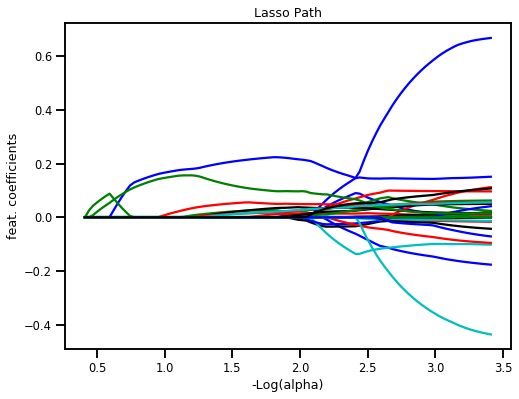

In [36]:
from itertools import cycle
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
plt.figure(figsize=(8,6))
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('feat. coefficients')
plt.title('Lasso Path')
#plt.legend((l1[-1],('Lasso', loc='lower left')
plt.axis('tight')
plt.show()

In [37]:
# observamos que features fueron seleccionadas y con que coeficientes de beta. 
# las features que tengan coeficiente distinto de 0 son seleccionadas.
lasso_featsel.coef_

array([ 0.00717021,  0.014669  ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.02413409,  0.        , -0.01017752,
        0.00161471,  0.        ,  0.        , -0.        ,  0.00913922,
       -0.00117641, -0.        ,  0.        , -0.        , -0.        ,
        0.2160645 ,  0.04922908,  0.        , -0.        ,  0.03729621,
       -0.        ,  0.02452974,  0.09696704,  0.02751567,  0.        ])

In [38]:
np.shape(lasso_featsel.coef_[:])

(30,)

In [39]:
lasso_num_feat_sel = int(np.count_nonzero(lasso_featsel.coef_))
print("La cantidad de features seleccionadas con Lasso son "+ str(lasso_num_feat_sel))

La cantidad de features seleccionadas con Lasso son 13


In [40]:
# las columnas correspondientes a las features seleccionadas figuran con True
lasso_feat_cols = lasso_featsel.coef_ != 0
lasso_feat_cols

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True, False])

In [41]:
# podemos ver que posicion de feature es la seleccionada para el valor de alpha seleccionado al inicio
np.where(lasso_feat_cols)

(array([ 0,  1,  7,  9, 10, 14, 15, 20, 21, 24, 26, 27, 28], dtype=int64),)

In [42]:
# generamos nuestro nuevo training set con las columnas seleccionadas luego de Lasso
xtrain_scal_red_lasso = xtrain_scal[:, lasso_feat_cols]
np.shape(xtrain_scal_red_lasso)

(398, 13)

In [43]:
# generamos nuestro nuevo testing set con las columnas seleccionadas luego de Lasso
xtest_scal_red_lasso = xtest_scal[:, lasso_feat_cols]
np.shape(xtest_scal_red_lasso)

(171, 13)

# Feature Selection con RFE

In [44]:
# creo un modelo clasificador de SVM para clasificar en cada iteracion del RFE y obtener un accuracy
costrfe = 50
svcrfe = svm.SVC(C=costrfe, kernel="linear")

In [45]:
# creo un modelo de RFE indicando que clasificador utilizar, el CV y que scoring quiero determinar para seleccionar las features
rfecv = RFECV(estimator=svcrfe, step=1, cv=5, scoring='accuracy')

In [46]:
# selecciono las variables con el set de train
rfecv.fit(xtrain_scal, ytrain)

RFECV(cv=5,
      estimator=SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [47]:
np.argmax(rfecv.grid_scores_)

18

Optimal number of features : 19


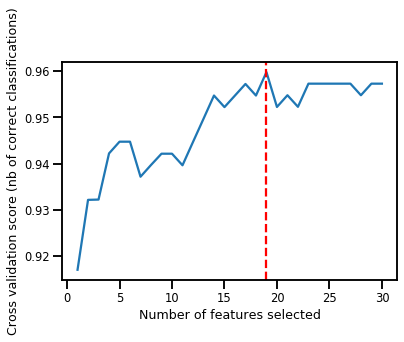

In [48]:
# Imprimo como varia el accuracy a medida que voy quitando features
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.axvline(x=np.argmax(rfecv.grid_scores_)+1, c= 'r', linestyle = '--')
plt.show()

In [49]:
# obtengo las posiciones de las columnas de las features que fueron seleccionadas con True (llamando a .support_)
feat_rfe = rfecv.support_ == True
feat_rfe

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True])

In [50]:
print("La cantidad de variables seleccionadas con RFE son = " + str(rfecv.n_features_))

La cantidad de variables seleccionadas con RFE son = 19


In [51]:
# transformo mi set de train a uno nuevo con las variables seleccionadas con RFE
xtrain_scal_red_rfe = xtrain_scal[:,rfecv.support_]
np.shape(xtrain_scal_red_rfe)

(398, 19)

In [52]:
# transformo mi set de test a uno nuevo con las variables seleccionadas con RFE
xtest_scal_red_rfe = xtest_scal[:,rfecv.support_]
np.shape(xtest_scal_red_rfe)

(171, 19)

# Asignación 01: 
Realizar un PCA con los dataset obtenidos luego de cada metodo de feature selection. Analizar si la distribucion de las samples varia mucho entre un subset de features y otro.

In [56]:
# cantidad de componentes a extraer
n_comps = 6
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal_red_lasso))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [57]:
xpca.shape

(398, 6)

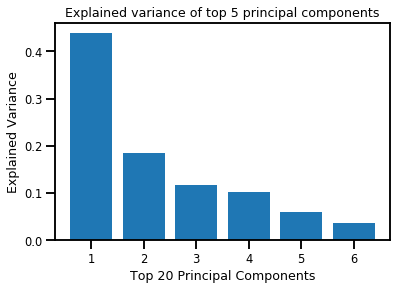

In [58]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [59]:
eigenvalues[0]

0.438260963632981

In [60]:
# cantidad de componentes a extraer
n_comps = 8
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal_red_rfe))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

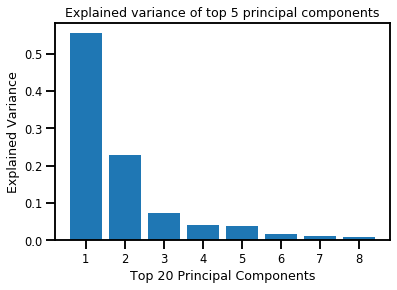

In [61]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [62]:
eigenvalues[0]

0.5553912504380444

In [63]:
n_comps = 6
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal_red_var))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [64]:
xpca.shape

(398, 6)

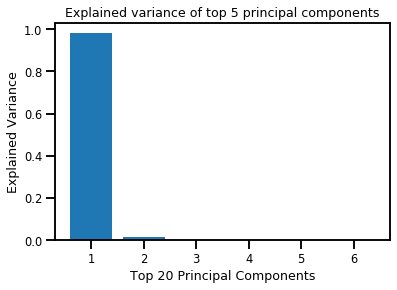

In [65]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [66]:
eigenvalues[0]

0.9813542287179149

# Asignación 02: 
Con las variables seleccionadas por cada método comparar cual es el grado de solapamiento de variables seleccionadas para los 3 metodos vistos. En otras palabras ¿se seleccionan las mismas variables en cada metodo o no?

In [67]:
lasso_feat_cols = lasso_featsel.coef_ != 0
lasso_feat_cols

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True, False])

In [85]:
a=np.where(lasso_feat_cols)


In [69]:
feat_rfe = rfecv.support_ == True
feat_rfe

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True])

In [76]:
b=np.where(feat_rfe)

In [77]:
c=np.where((np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values)

In [79]:
vector=pd.concat([a,b,c],axis=1)

TypeError: cannot concatenate object of type "<class 'tuple'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

# Asignacion 03: 
Aplicar clasificadores de SVM, KNN y LR utilizando las variables seleccionadas por cada método. Comparar con accuracy  y AUC cual fue el mejor metodo de selección de variables.